In [71]:
import json
import os
from collections import defaultdict

def normalize_average_operations(json_dir, output_dir):
    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Dictionary to store aggregated data for each prefix
    prefix_data = defaultdict(lambda: {"total_operations": 0, "file_count": 0, "aggregated_data": defaultdict(float)})

    # Loop through all JSON files in the directory
    for filename in os.listdir(json_dir):
        if filename.endswith(".json"):
            # Extract the prefix (everything before "_run" or ".result.json")
            if "_run" in filename:
              prefix = filename.split("_run")[0]

            filepath = os.path.join(json_dir, filename)
            with open(filepath, "r") as file:
                data = json.load(file)
                
                # Add the average_num_operations_total to the total for this prefix
                if "sum_num_searches_total" in data:
                    prefix_data[prefix]["total_operations"] += data["sum_num_searches_total"]
                    prefix_data[prefix]["file_count"] += 1

                # Aggregate other metrics for this prefix (optional)
                for key, value in data.items():
                    if isinstance(value, (int, float)):
                        prefix_data[prefix]["aggregated_data"][key] += value

    # Calculate the average for each prefix and save the results
    for prefix, data in prefix_data.items():
        if data["file_count"] > 0:
            average_operations = data["total_operations"] / data["file_count"]
        else:
            average_operations = 0

        # Create the output JSON structure for this prefix
        output_data = {
            "sum_num_searches_total": average_operations,
            **{key: value / data["file_count"] for key, value in data["aggregated_data"].items()}
        }

        # Save the output JSON to a file
        output_file = os.path.join(output_dir, f"{prefix}_average.json")
        with open(output_file, "w") as outfile:
            json.dump(output_data, outfile, indent=4)

        print(f"Averaged JSON for prefix '{prefix}' saved to {output_file}")


In [72]:
import json
import os
import matplotlib.pyplot as plt
import re
from collections import defaultdict

In [73]:
def build_graphs(folder_path, needed_stuctures = None):
    pattern = re.compile(r"(.*?)_numThreads_(\d+)_average\.json")
    # Data structure: {prefix: {thread_count: average_ops}}
    data = defaultdict(dict)

    # Read all JSON files
    for filename in os.listdir(folder_path):
        if filename.endswith(".json"):
            match = pattern.match(filename)
            if match:
                prefix = match.group(1)  # Extract prefix (e.g., "aksenov_splaylist_64.debra_zipfian")
                num_threads = int(match.group(2))  # Extract thread count
                file_path = os.path.join(folder_path, filename)
                
                with open(file_path, 'r') as f:
                    json_data = json.load(f)
                    data[prefix][num_threads] = json_data["sum_num_searches_total"]

    # Plot all prefixes on one graph
    colors = plt.cm.tab10.colors  # Color palette
    markers = ['o', 's', 'D', '^', 'v', '>', '<', 'p', '*', 'h']  # Distinct markers

    data_by_short_prefix = defaultdict(lambda: defaultdict(list))

    for idx, (prefix, thread_data) in enumerate(data.items()):
        sorted_threads = sorted(thread_data.keys())
        avg_ops = [thread_data[t] for t in sorted_threads]
        
        # Shorten prefix for legend (e.g., "zipfian" instead of full name)
        short_prefix = prefix.split("_")[-1]  # Adjust based on your naming
        name_structure = prefix.split(".debra")[0]

        data_by_short_prefix[short_prefix][name_structure].append((sorted_threads, avg_ops))
    
    for (short_prefix, datas) in data_by_short_prefix.items():
        plt.figure(figsize=(6, 4))
        ids = []
        idx = 0
        for (name_structure, lst) in sorted(datas.items()):
            if needed_stuctures == None or name_structure in needed_stuctures:
                idx = needed_stuctures[name_structure]
                for sorted_threads, avg_ops in lst:
                    ids = sorted_threads
                    plt.plot(
                        sorted_threads,
                        avg_ops,
                        marker=markers[idx % len(markers)],
                        linestyle='-',
                        color=colors[idx % len(colors)],
                        linewidth=2,
                        markersize=8,
                        label=name_structure
                    )

        # Customize
        plt.xlabel("Количество ядер", fontsize=12)
        plt.ylabel("Среднее число операций", fontsize=12)
        plt.title(f"Распределение: {short_prefix}", fontsize=14)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.xticks(ids)  # Ensure all thread counts are labeled
        plt.legend(title="Структуры данных")  # Legend outside
        plt.tight_layout()

        plt.show()

In [74]:
normalize_average_operations("jsons/big_tests", "averaged_results/big_tests")
build_graphs("averaged_results/big_tests") 


Averaged JSON for prefix 'batched_spaylist_logical_remove_64.debra_zipfian_numThreads_95' saved to averaged_results/big_tests/batched_spaylist_logical_remove_64.debra_zipfian_numThreads_95_average.json
Averaged JSON for prefix 'batched_spaylist_seq_lock_64.debra_99-1_numThreads_95' saved to averaged_results/big_tests/batched_spaylist_seq_lock_64.debra_99-1_numThreads_95_average.json
Averaged JSON for prefix 'batched_spaylist_logical_remove_64.debra_95-5_numThreads_71' saved to averaged_results/big_tests/batched_spaylist_logical_remove_64.debra_95-5_numThreads_71_average.json
Averaged JSON for prefix 'batched_spaylist_logical_remove_64.debra_90-10_numThreads_23' saved to averaged_results/big_tests/batched_spaylist_logical_remove_64.debra_90-10_numThreads_23_average.json
Averaged JSON for prefix 'batched_spaylist_sorted_by_selfhits_64.debra_99-1_numThreads_71' saved to averaged_results/big_tests/batched_spaylist_sorted_by_selfhits_64.debra_99-1_numThreads_71_average.json
Averaged JSON fo

TypeError: 'NoneType' object is not subscriptable

<Figure size 432x288 with 0 Axes>

Averaged JSON for prefix 'batched_spaylist_logical_remove_64.debra_uniform_numThreads_3' saved to averaged_results/batched_spaylist_logical_remove_64.debra_uniform_numThreads_3_average.json
Averaged JSON for prefix 'batched_splaylist_64.debra_99,1-0,1_numThreads_12' saved to averaged_results/batched_splaylist_64.debra_99,1-0,1_numThreads_12_average.json
Averaged JSON for prefix 'batched_spaylist_sorted_by_selfhits_64.debra_99,1-0,1_numThreads_1' saved to averaged_results/batched_spaylist_sorted_by_selfhits_64.debra_99,1-0,1_numThreads_1_average.json
Averaged JSON for prefix 'aksenov_splaylist_64.debra_90-10_numThreads_2' saved to averaged_results/aksenov_splaylist_64.debra_90-10_numThreads_2_average.json
Averaged JSON for prefix 'batched_spaylist_logical_remove_64.debra_95-5_numThreads_1' saved to averaged_results/batched_spaylist_logical_remove_64.debra_95-5_numThreads_1_average.json
Averaged JSON for prefix 'batched_spaylist_seq_lock_64.debra_90-10_numThreads_14' saved to averaged_re

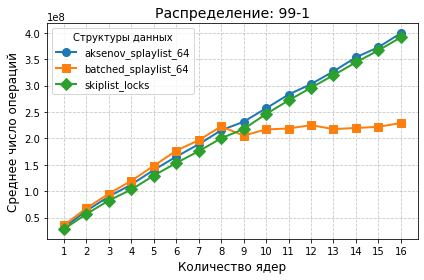

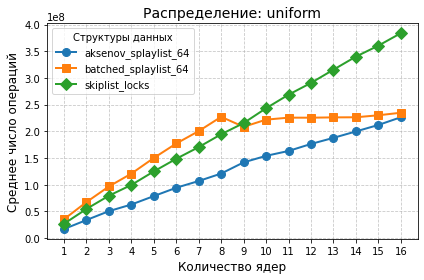

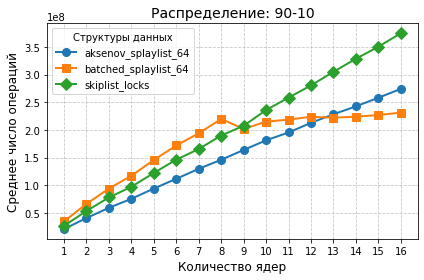

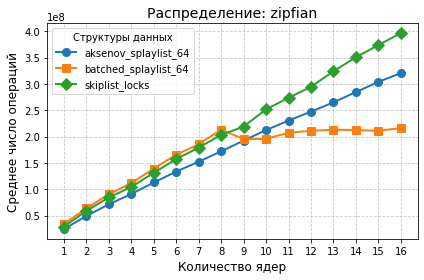

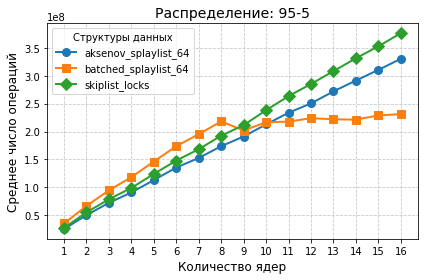

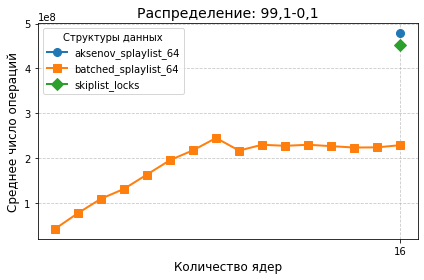

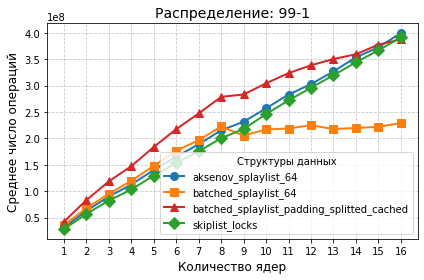

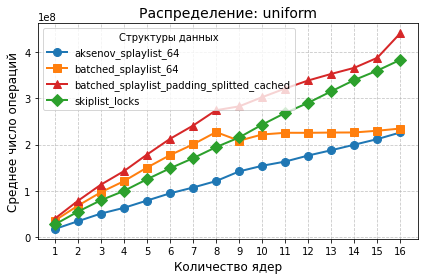

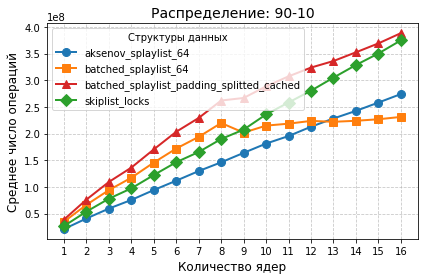

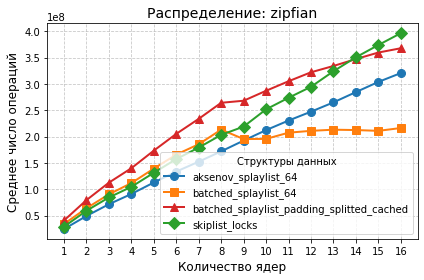

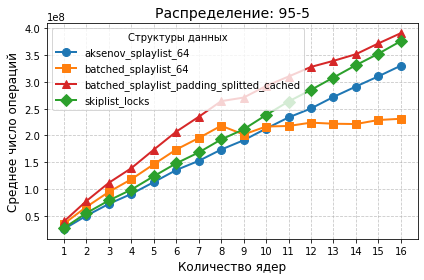

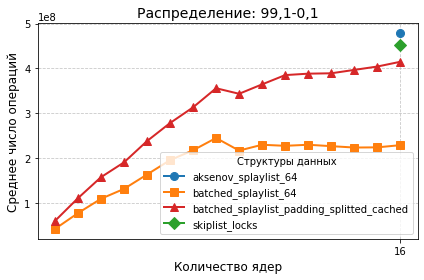

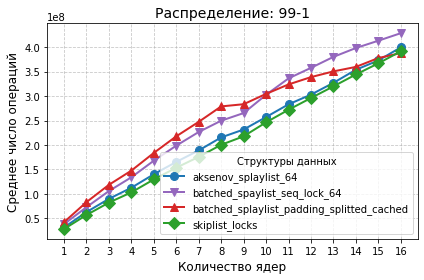

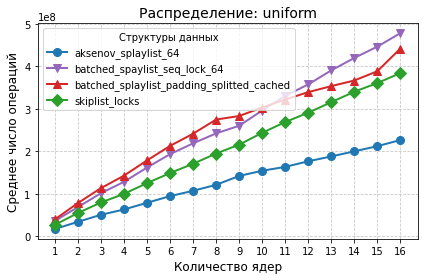

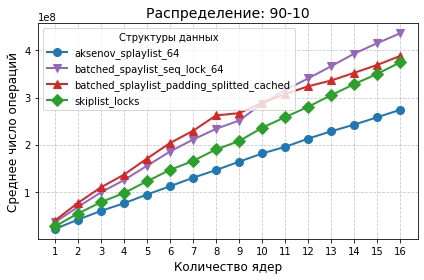

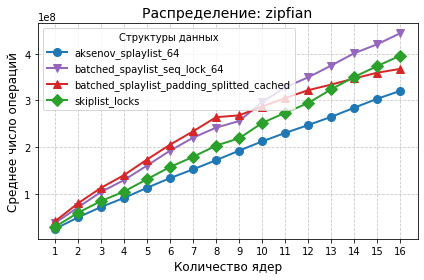

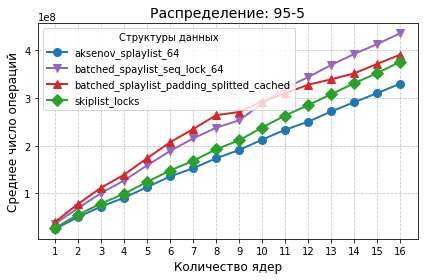

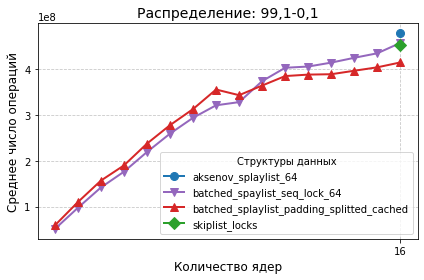

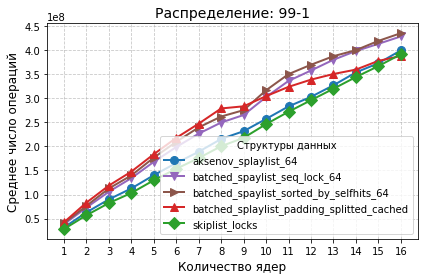

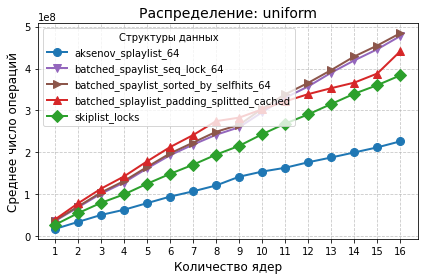

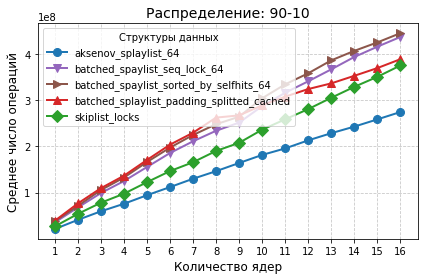

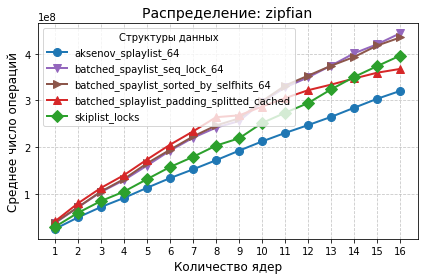

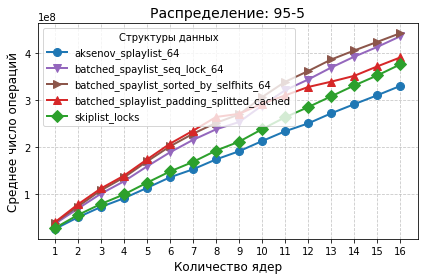

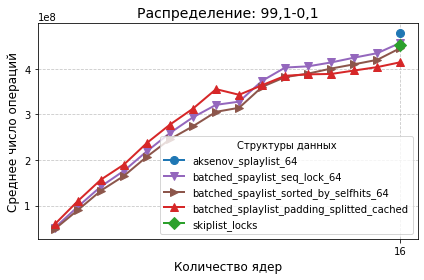

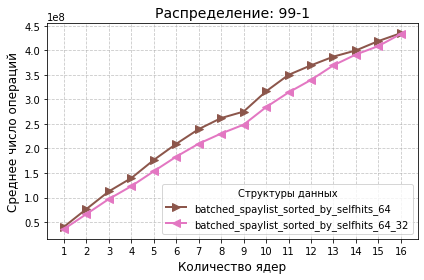

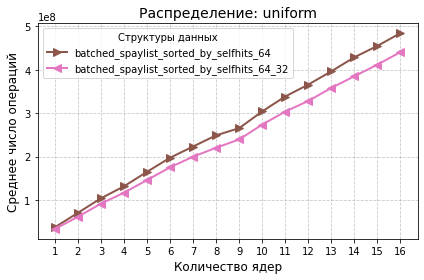

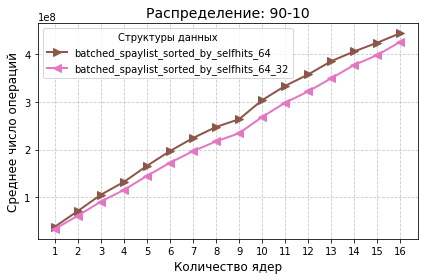

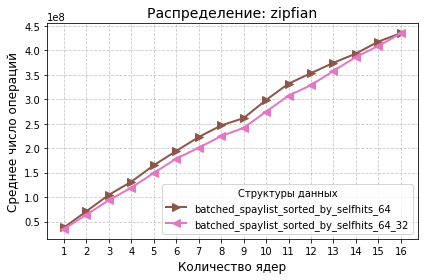

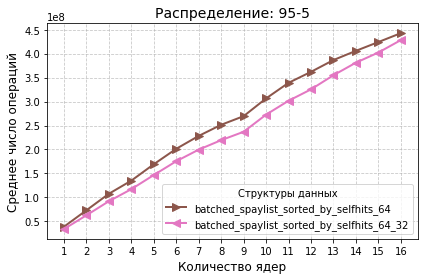

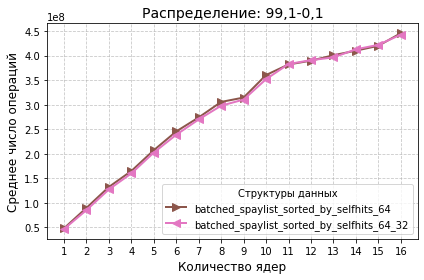

In [77]:
normalize_average_operations("jsons", "averaged_results")
build_graphs("averaged_results", {"skiplist_locks" : 2, "aksenov_splaylist_64" : 0, "batched_splaylist_64" : 1}) 
build_graphs("averaged_results", {"skiplist_locks" : 2, "aksenov_splaylist_64" : 0, "batched_splaylist_64" : 1, "batched_splaylist_padding_splitted_cached" : 3})
build_graphs("averaged_results", {"skiplist_locks" : 2, "aksenov_splaylist_64" : 0, "batched_spaylist_seq_lock_64" : 4,  "batched_splaylist_padding_splitted_cached" : 3})
build_graphs("averaged_results", {"skiplist_locks" : 2, "aksenov_splaylist_64" : 0, "batched_spaylist_seq_lock_64" : 4, "batched_splaylist_padding_splitted_cached" : 3, "batched_spaylist_sorted_by_selfhits_64" : 5})
build_graphs("averaged_results", {"batched_spaylist_sorted_by_selfhits_64" : 5, "batched_spaylist_sorted_by_selfhits_64_32" : 6})